In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x):
    y = 0
    y = x[0]**2 + x[0]*x[1] + x[1]**2 + 5
    return y

### write a function that performs contour plot (level sets) of a two variate function


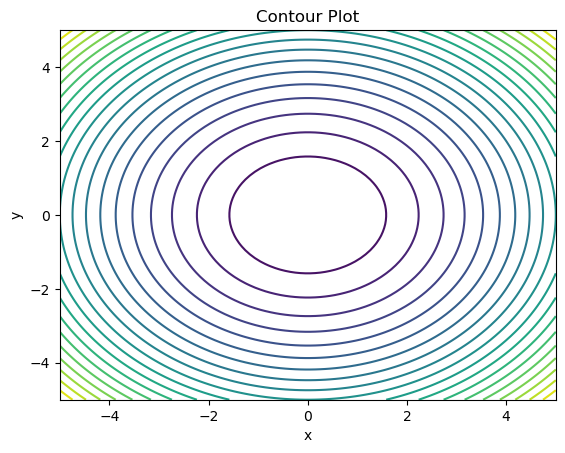

In [30]:
def plot_contours(f1, x0, x1, y0, y1):
    x = np.linspace(x0, x1, 100)
    y = np.linspace(y0, y1, 100)
    X, Y = np.meshgrid(x, y)
    Z = f1(np.vstack((X.flatten(), Y.flatten())).T).reshape(X.shape)
    plt.contour(X, Y, Z, levels=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot')
    plt.show()
def f1(x):
    return x[:, 0]**2 + x[:, 1]**2
x0, x1 = -5, 5
y0, y1 = -5, 5
plot_contours(f1, x0, x1, y0, y1)

### compute the gradient vector of f at x where x is an nx1 array representing a vector of dimension n

In [31]:
def gradient(f,x, h = 1e-7):

    n = x.shape[0]
    grad = np.zeros((n,1))
    for i in range(n):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        grad[i] = (f(x_plus_h) - f(x_minus_h)) / (2 * h)
    return grad
x = np.linspace(x0,x1,2)
grad = gradient(f, x)
print("Gradient:", grad.flatten())

Gradient: [-5.00000001  5.00000001]


In [19]:
'''use the gradient descent to perform optimization
the difference with method of steepest descent is that constant 
step size is used here. 
 
  The maximum number of iterations can be fixed using a global 
  parameter 
       MAXITER 
    whose default value is 50 (it may be varied to test for improvement)
    
  gradient descent iterations may be done MAXITER number of times.
    
    the function returns 
             1. a matrix X_pts of size MAXITER x dim whose k th row contains x generated in the k th iteration
             2. the objective function value at each row of the matrix
    

Function Arguments : 
   f : objective function
   x0 : starting point of iterations (n x 1)
'''
MAXITER = 50

def gradient_descent(f, x0:np.array, alpha = 1e-5):
    X_pts = np.zeros((MAXITER, x0.shape[0])) #this variable ultimately will hold the minimum
    f_X = np.zeros((MAXITER))

    x = x0  # Initializing the current point with the starting point

    for k in range(MAXITER):
        grad = gradient(f, x)  # Calculating the gradient at the current point
        x = x - alpha * grad  # Updating the current point using the gradient and step size
        # Storing the updated point and objective function value
        X_pts[k, :] = x.flatten()
        f_X[k] = f(x)
    return X_pts, f_X
    

In [20]:
'''
  Implement method of steepest descent.
  
  the chief difference with the above gradient descent is an intermediate
  where step size alpha is adaptively computed by solving a function called 
  
        phi(alpha) = f(x - alpha*grad_f)//refer to lecture notes for details
  
  Optimization of this function can be done using a single variable optimization 
  function secant method (you may refer to https://planetmath.org/secantmethod)
  
  gradient descent iterations may be done MAXITER number of times.  
  
'''
def steepest_descent(f,x0:np.array):
    X_pts = np.zeros((MAXITER, x0.shape[0]))  # This variable ultimately will hold the minimum
    f_X = np.zeros((MAXITER))

    x = x0  # Initializing the current point with the starting point

    for k in range(MAXITER):
        grad = gradient(f, x)  # Calculating the gradient at the current point

        # Defining the phi(alpha) function for line search
        def phi(alpha):
            return f(x - alpha * grad)

        # Initializing step size
        alpha = 0.1  # You can choose an initial guess for alpha

        # Performing the secant method inline to find the optimal step size (alpha)
        epsilon = 1e-6  # Tolerance for convergence
        max_secant_iter = 100  # Maximum secant iterations

        for _ in range(max_secant_iter):
            alpha_prev = alpha
            phi_alpha = phi(alpha)
            phi_alpha_prime = phi(alpha - epsilon)
            
            if abs(phi_alpha - phi_alpha_prime) < 1e-12:
                break  # Avoiding division by nearly zero
            
            alpha_candidate = alpha - (phi_alpha * (alpha - alpha_prev)) / (phi_alpha - phi_alpha_prime)
            
            if abs(alpha_candidate - alpha) < 1e-6:
                break  # Convergence criterion: stop if alpha doesn't change much
            
            alpha = alpha_candidate

        x = x - alpha * grad  # Updating the current point using the computed step size

        # Storing the updated point and objective function value
        X_pts[k, :] = x.flatten()
        f_X[k] = f(x)   
    return X_pts, f_X   

In [21]:
n = 2
x = np.random.randn(n,1)

grad = gradient(f,x)
print("Gradient of the given function at x : ", x.transpose())
print("                         Grad : ",grad.transpose())

Gradient of the given function at x :  [[-0.23369731 -0.30608528]]
                         Grad :  [[-0.7734798  -0.84586778]]


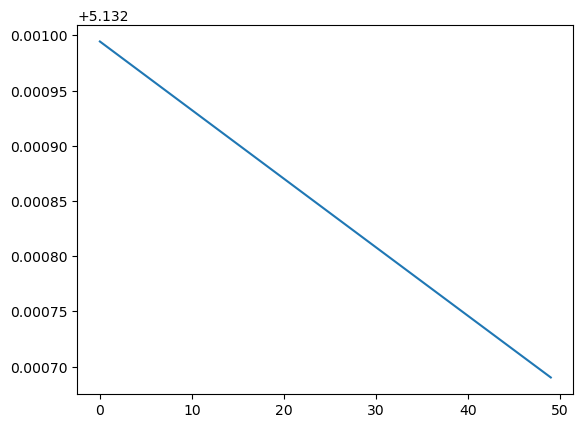

In [22]:
x0 = np.random.randn(n,1)
_,f_X = gradient_descent(f,x0)

plt.plot(f_X)
plt.show()

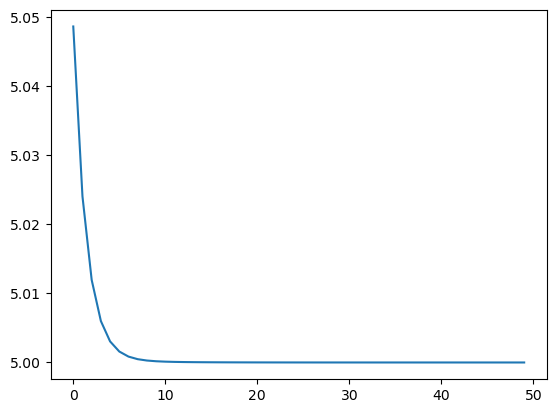

In [23]:
x0 = np.random.randn(n,1)
X_pts,f_X = steepest_descent(f,x0)

plt.plot(f_X)
plt.show()

### Implement Gram Schmidt Orthogonalization to generate n vectors
- The following function CreateQCVectors takes a matrix V of and matrix Q
  as input arguments.
- Each row of the array is a vector. Check for linear independence between
  vectors. If they are not lin. ind. the function should return an error message
- Otherwise the function returns an array whose rows are Q Conjugate

In [24]:
def CreateQCVectors(V: np.array, Q: np.array):
    
    # Check if the number of vectors in Q is less than the number of vectors in V
    if Q.shape[0] > V.shape[0]:
        raise ValueError("Q has more vectors than V. Linear independence cannot be checked.")        
    QCVectors = np.zeros_like(V)  # Q conjugate vectors    
    for i in range(Q.shape[0]):
        
        # Perform Gram-Schmidt process
        QCVectors[i, :] = Q[i, :]
        
        for j in range(i):
            # Subtract the projection of Q[i] onto Q[j] from QCVectors[i]
            QCVectors[i, :] -= np.dot(Q[i, :], QCVectors[j, :]) / np.dot(QCVectors[j, :], QCVectors[j, :]) * QCVectors[j, :]

        # Check for linear independence
        if np.allclose(QCVectors[i, :], np.zeros_like(QCVectors[i, :])):
            raise ValueError(f"Vectors are linearly dependent. QCVectors[{i}] is a zero vector.")

    return QCVectors  

### Implement Conjugate Gradient Optimization for minimizing 
   \begin{equation*}
     \frac{1}{2}x^TQx - b^Tx
   \end{equation*}

- Complete the following function 

In [25]:
def ConjugateGradient(Q, b):
    
    x_opt = np.zeros_like(b)
    r = b - np.dot(Q, x_opt)  # Residual
    p = r.copy()  # Initial search direction

    f_val_iter = np.zeros(b.shape[0])  # Stores the function values at each iteration of the algorithm

    for k in range(b.shape[0]):
        alpha = np.dot(r, r) / np.dot(p, np.dot(Q, p))
        x_opt = x_opt + alpha * p  # Update solution
        r_new = r - alpha * np.dot(Q, p)  # Update residual
        beta = np.dot(r_new, r_new) / np.dot(r, r)  # Compute beta for the next iteration
        p = r_new + beta * p  # Update search direction
        r = r_new  # Update residual for the next iteration
        # Compute the function value and store it
        f_val_iter[k] = 0.5 * np.dot(x_opt, np.dot(Q, x_opt)) - np.dot(b, x_opt)

    return x_opt, f_val_iter

In [26]:
def generate_positive_definite_matrix(n): 
    A = np.random.randn(n, n)
    Q = np.dot(A, A.T)  # Symmetric matrix
    # Add a positive definite term to ensure positive definiteness
    Q += np.eye(n) * np.max(np.abs(np.linalg.eigvals(Q)))  # Ensure positive definiteness
    return Q

In [27]:
Q = generate_positive_definite_matrix(n)
b = np.random.randn(n)

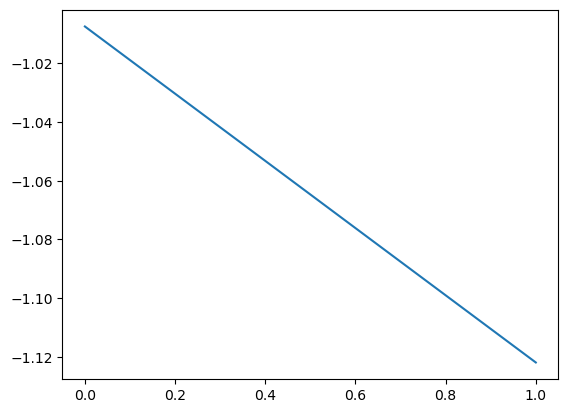

('Deviation for Theoretically Expected : ', 5.551115123125783e-17)


In [29]:
x0 = np.random.randn(n,1)
x_opt,f_X = ConjugateGradient(Q,b)

plt.plot(f_X)
plt.show()

x_expected = np.linalg.inv(Q) @ b
print(("Deviation for Theoretically Expected : ", np.linalg.norm(x_opt-x_expected)))